In [1]:
import os
import requests
import torch
import json

from utils import load_local_vision_dataset, TorchDataset, convert_tensor_to_base64, convert_to_base64
from torchvision import transforms
from torchvision.transforms import ToTensor, Compose

In [2]:


dataset = load_local_vision_dataset(dataset_name="mvtec_ad",
                                    dataset_config_path="./datasets.json",
                                    root_dir="./",
                                    task_type="object_detection",
                                    )


transform = Compose([ToTensor()])

dataset = TorchDataset(dataset, transform=transform)
sample_img, sample_tgt = dataset[70]
print(sample_img)
print(sample_tgt)

tensor([[[0.4863, 0.4667, 0.4314,  ..., 0.5098, 0.5059, 0.5098],
         [0.4784, 0.4824, 0.4745,  ..., 0.5490, 0.5333, 0.5176],
         [0.4902, 0.4902, 0.4941,  ..., 0.5608, 0.5490, 0.5373],
         ...,
         [0.5294, 0.5412, 0.5451,  ..., 0.5569, 0.5608, 0.5725],
         [0.5529, 0.5490, 0.5529,  ..., 0.5804, 0.5882, 0.5804],
         [0.5176, 0.5216, 0.5216,  ..., 0.5569, 0.5529, 0.5569]],

        [[0.3529, 0.3451, 0.3294,  ..., 0.4039, 0.3961, 0.3922],
         [0.3569, 0.3490, 0.3490,  ..., 0.4039, 0.3961, 0.3961],
         [0.3529, 0.3608, 0.3647,  ..., 0.4157, 0.4039, 0.4000],
         ...,
         [0.3804, 0.3961, 0.3922,  ..., 0.4118, 0.4196, 0.4235],
         [0.3961, 0.4000, 0.4078,  ..., 0.4235, 0.4235, 0.4275],
         [0.3765, 0.3804, 0.3725,  ..., 0.3882, 0.3961, 0.4000]],

        [[0.3098, 0.3176, 0.2824,  ..., 0.3608, 0.3529, 0.3569],
         [0.3098, 0.3176, 0.2902,  ..., 0.3529, 0.3490, 0.3529],
         [0.3059, 0.3059, 0.3020,  ..., 0.3451, 0.3451, 0.

In [18]:
base64_image = convert_tensor_to_base64(sample_img)
base64_image

'iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADwf7zUAAEAAElEQVR4nEz927YkR7IkiImImnnETqDqdLOHs+aB/8R3fgs/mKsXpy+nqwp7h5uK8EE9z/AJSCCBneFhrqYqN+X/+//1/7ytv85fW/y6RC5/Kuuu/fcLf6Xx+bn/+z//+m///vOvz79H+fNd/+nP//yf/vz6ul4UgqtPA8ep2Kd//tGfv/51Pp+fj3k6B/25z8+d2+fufEz7dsdO3IkCUwAUlBBKRBDFB+1GGk03cRnHSBqJgSBIHBIxELGAkCyGhBSiQJa0FtdaX6/r9aqv/fpa+/31+tu1f31dX9f7VVy1wFIW1hGzckk3pW5CARFc6nY5LuIOtva98mKk/RFWcpgrZLucD8AloJuCccjFyFjkX8LlQFp7tUOkaVgJ4Gb0JpD+lwFT1YgS/yu9v2/8y/0//+c//ut/+x//7Z9//fPzud0+TTkOBKeQFgtcUFTifToIAITzV4AkAQqZfxHDDJKYFBAYkoENHKDIXFV/fl3/29///N//b3/7t/ff3u9aDPmqaoEpMgV2QUQAkoiqu2HuvZC2uGEi8bbvprtlpZJSEcZhIze/xZcsU8xNrBAdUfdGmY0bAc27IJEtOp/lN5imzFR6sQwfw7RPWnG7b9zO7Y9vfJx//vzj5+c47D7fhz+Nv/r+ue9zn0/Dffs+Th+/zBu0UAKoXb9Kp0CxXLioCkW3AcdoBA4OqEJVFWC6Yx7n7o/PT6zkpG02uIAbWIqlqGovbq1rXa/39cd7/+26/vzb64/r69fF117Cq9baOKidqOjC6tyACJARV+NES7zpYiEm8Il36G1gqVttQKACH3JTEG9pVcfwIQ1EEow7UUKEYMAU4QZkCbrxAakwoYGT48b98/3fvs9//e//5//3f/3rr78+fboR5NgEBaZBoAkhBJsoJCCA+DA0pIS0wI8RQggAIwQ8LyQRJJGSzC9LtRd+Xdf//p/

In [4]:
# base64_image, mime_type = convert_to_base64("./sample.png")
# # print(base64_image)
# print(mime_type)

image/png


In [19]:
print(len(base64_image))

1680404


{'messages': [{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': [{'type': 'text', 'text': 'What is this object?'}, {'type': 'image_url', 'image_url': {'url': ''}}]}], 'max_tokens': 200}

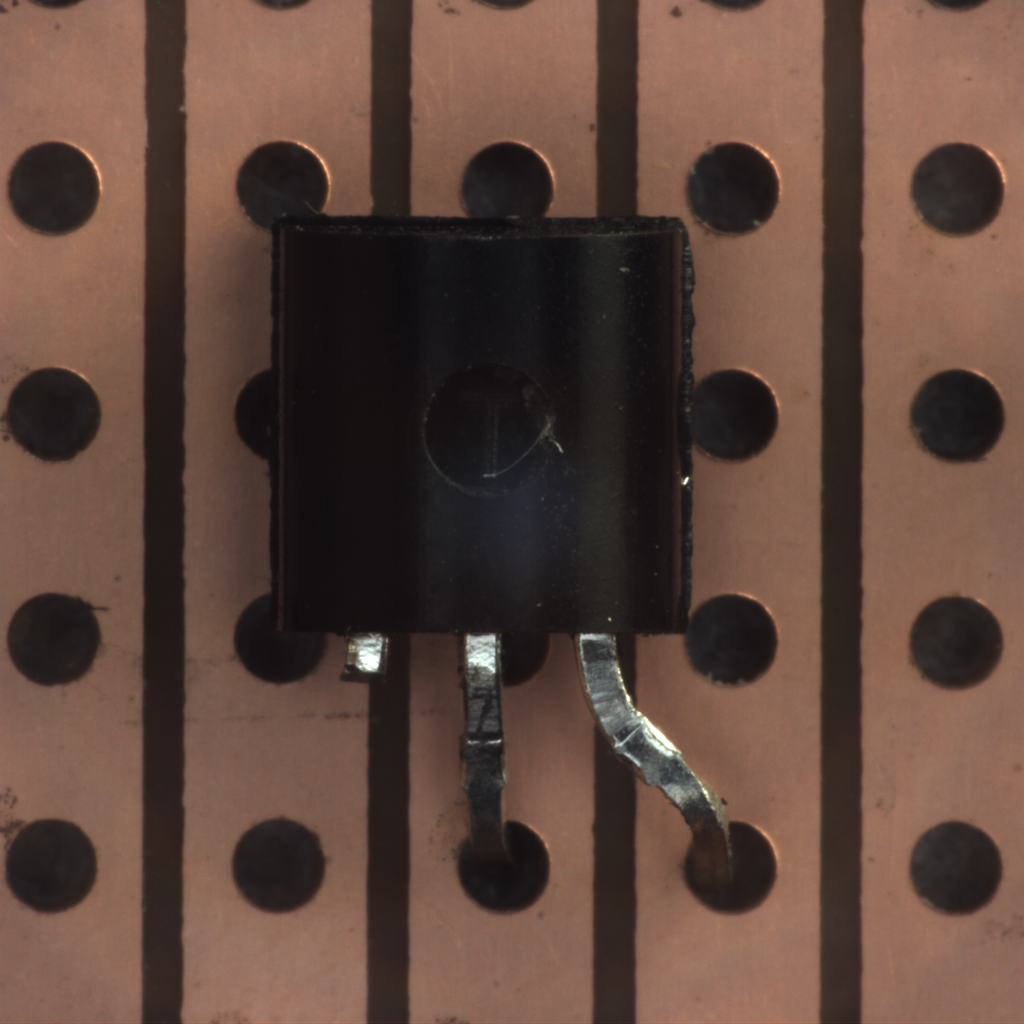

In [20]:
def get_request_body(prompt, base64_image):
    request_body = {
        "messages": [
            {
                "role": "system",
                "content": "You are a helpful assistant."
            },
            {
                "role": "user",
                "content": [
                        {
                            "type": "text",
                            "text": f"{prompt}"
                        },
                    {
                            "type": "image_url",
                            "image_url": {
                                "url": "data:image/png;base64," + f"{base64_image}",
                            }
                    }
                ]
            }
        ],
        "max_tokens": 200
    }

    return request_body


# Sanity check
prompt = "What is this object?"

print(get_request_body(prompt, base64_image))

In [28]:
category = "transistor"
prompt = """You are an expert visual inspector for a manufacturing company that makes transistor. You will be shown an image of a transistor and you need to identify if it is defective or not. If it is defective, you need to identify the defect and explain your reasoning for the defect. Think step-by-step - first identify if there is a defect. Second, if there is a defect, identify the type of defect. The defect can **only** be of the following types: 1. bent_lead, 2. cut_lead, 3. misplaced, 4. damaged_case. Then explain your reasoning for the defect. Finally, draw an enclosing bounding box around the defect and provide the relative coordinates (between 0-1) of the bounding box in the format [x_top, y_top, x_bottom, y_bottom]. Please return your response **strictly** as a valid JSON object with the following format:
    {
    "is_defective": "<yes or no>",
    "reason": "<describe the defect. leave empty if is_defective is no>",
    "defect_type": "<type of defect. leave empty if is_defective is false>",
    "bounding_box": "[x_top, y_top, x_bottom, y_bottom]. leave empty if is_defective is false"
    }
"""

prompt

'You are an expert visual inspector for a manufacturing company that makes transistor. You will be shown an image of a transistor and you need to identify if it is defective or not. If it is defective, you need to identify the defect and explain your reasoning for the defect. Think step-by-step - first identify if there is a defect. Second, if there is a defect, identify the type of defect. The defect can **only** be of the following types: 1. bent_lead, 2. cut_lead, 3. misplaced, 4. damaged_case. Then explain your reasoning for the defect. Finally, draw an enclosing bounding box around the defect and provide the relative coordinates (between 0-1) of the bounding box in the format [x_top, y_top, x_bottom, y_bottom]. Please return your response **strictly** as a valid JSON object with the following format:\n    {\n    "is_defective": "<yes or no>",\n    "reason": "<describe the defect. leave empty if is_defective is no>",\n    "defect_type": "<type of defect. leave empty if is_defective

{'messages': [{'role': 'system', 'content': 'You are a helpful assistant.'},
  {'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are an expert visual inspector for a manufacturing company that makes transistor. You will be shown an image of a transistor and you need to identify if it is defective or not. If it is defective, you need to identify the defect and explain your reasoning for the defect. Think step-by-step - first identify if there is a defect. Second, if there is a defect, identify the type of defect. The defect can **only** be of the following types: 1. bent_lead, 2. cut_lead, 3. misplaced, 4. damaged_case. Then explain your reasoning for the defect. Finally, draw an enclosing bounding box around the defect and provide the relative coordinates (between 0-1) of the bounding box in the format [x_top, y_top, x_bottom, y_bottom]. Please return your response **strictly** as a valid JSON object with the following format:\n    {\n    "is_defective": "<yes or no>",
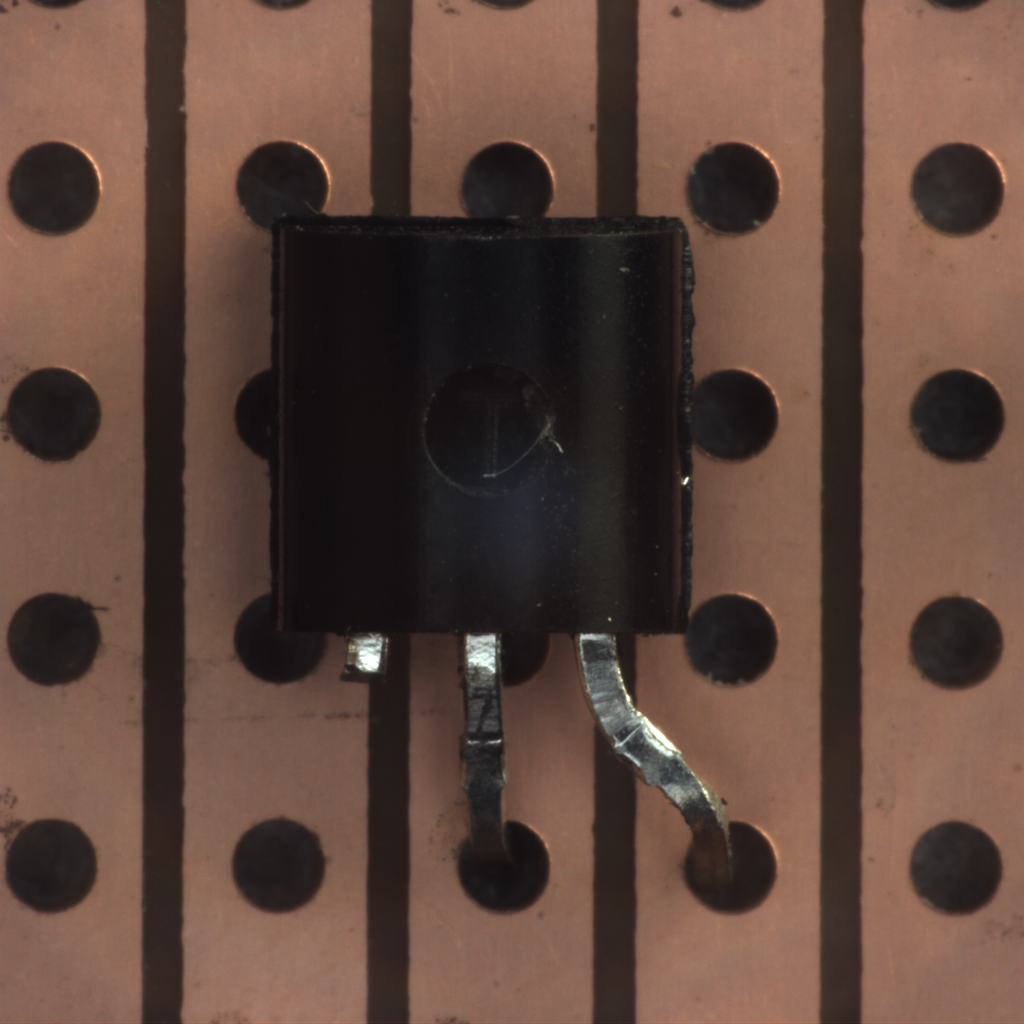

In [29]:
request_body = get_request_body(prompt, base64_image)
request_body

In [30]:
endpoint = "https://customvision-dev-aoai.openai.azure.com"
deployment_name = "gpt4o-001"
url = f'{endpoint}/openai/deployments/{
    deployment_name}/chat/completions?api-version=2024-02-15-preview'

headers = {'api-key': os.getenv("AZURE_OPENAI_API_KEY"),
           'Content-Type': 'application/json'}


response = requests.post(url, headers=headers, json=request_body, timeout=120)

In [31]:
result = response.json()
result

{'choices': [{'content_filter_results': {'hate': {'filtered': False,
     'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}},
   'finish_reason': 'stop',
   'index': 0,
   'logprobs': None,
   'message': {'content': '```json\n{\n  "is_defective": "yes",\n  "reason": "The transistor has bent leads.",\n  "defect_type": "bent_lead",\n  "bounding_box": "[0.45, 0.65, 0.55, 0.85]"\n}\n```',
    'role': 'assistant'}}],
 'created': 1720200537,
 'id': 'chatcmpl-9hh1tWaLzA0C3kOfAb2AsHxxHvCzC',
 'model': 'gpt-4o-2024-05-13',
 'object': 'chat.completion',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_result': {'jailbreak': {'filtered': False,
     'detected': False},
    'custom_blocklists': {'filtered': False, 'details': []}}},
  {'prompt_index': 1,
   'content_filter_result': {'sexual': {'filtered': False, 'severity': 'safe'},
    'violen

In [32]:
result["choices"][0]["message"]["content"]

'```json\n{\n  "is_defective": "yes",\n  "reason": "The transistor has bent leads.",\n  "defect_type": "bent_lead",\n  "bounding_box": "[0.45, 0.65, 0.55, 0.85]"\n}\n```'